In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

## 随机梯度更新

epoch 50, x1: 0.067371, x2: 0.002246


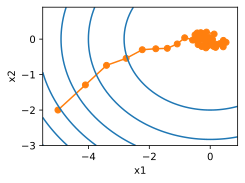

In [2]:
def f(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 目标函数的梯度
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # 常数学习速度
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## 动态学习率

epoch 1000, x1: -0.890130, x2: -0.068788


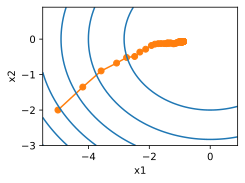

In [3]:
def exponential_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.110327, x2: 0.151521


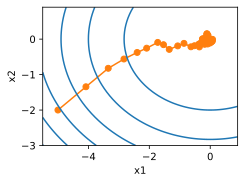

In [4]:
def polynomial_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## 小结

- 对于凸问题，我们可以证明，对于广泛的学习率选择，随机梯度下降将收敛到最优解。
- 对于深度学习而言，情况通常并非如此。但是，对凸问题的分析使我们能够深入了解如何进行优化，即逐步降低学习率，尽管不是太快。
- 如果学习率太小或太大，就会出现问题。实际上，通常只有经过多次实验后才能找到合适的学习率。
- 当训练数据集中有更多样本时，计算梯度下降的每次迭代的代价更高，因此在这些情况下，首选随机梯度下降。
- 随机梯度下降的最优性保证在非凸情况下一般不可用，因为需要检查的局部最小值的数量可能是指数级的。

## 练习

1. 尝试不同的随机梯度下降学习率计划和不同的迭代次数进行实验。特别是，根据迭代次数的函数来绘制与最优解(0, 0)的距离。

2. 证明对于函数$f(x_1, x_2) = x_{1}^{2} + 2x_{2}^{2}$而言，向梯度添加正态噪声等同于最小化损失函数$f(x,w)=(x_1-w_1)^2+2(x_2 - w_2)^2$，其中x是从正态分布中提取的。

3. 从$\{(x_1,y_1), ... ,(x_n,y_n)\}$分别使用替换方法以及不替换方法进行采样时，比较随机梯度下降的收敛性。

4. 如果某些梯度（或者更确切地说与之相关的某些坐标）始终比所有其他梯度都大，将如何更改随机梯度下降求解器？

5. 假设$f(x)=x^2(1+sinx)$。f有多少局部最小值？请试着改变f以尽量减少它需要评估所有局部最小值的方式。